In [259]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
%matplotlib inline

from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import  MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, average_precision_score, recall_score

In [2]:
df = pd.read_csv('dataset/final_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [93]:
df.head()

,title,subreddit,author,subreddit_id,id,comments,combined_title_&_comment,subred_numeric,tokens,num_words,average_word_len,lems,stems,neg,neu,pos,compound,sent_score
0,Mulvaney acknowledges Ukraine aid was withheld...,Liberal,first52,t5_2qxt5,djdfhm,NaN,Mulvaney acknowledges Ukraine aid was withheld...,0,"['Mulvaney', 'acknowledges', 'Ukraine', 'aid',...",10,6.200000,Mulvaney acknowledges Ukraine aid wa withheld ...,mulvaney acknowledg ukrain aid wa withheld to ...,0.000,0.769,0.231,0.4019,1
1,"I have concerns about trump ""hosting"" the G7 a...",Liberal,djinnisequoia,t5_2qxt5,djdeoe,NaN,"I have concerns about trump ""hosting"" the G7 a...",0,"['I', 'have', 'concerns', 'about', 'trump', 'h...",14,4.357143,I have concern about trump hosting the G7 at D...,I have concern about trump host the G7 at dora...,0.000,1.000,0.000,0.0000,0
2,Swing district Democrats build on cash advanta...,Liberal,Bobsind,t5_2qxt5,djbsw2,NaN,Swing district Democrats build on cash advanta...,0,"['Swing', 'district', 'Democrats', 'build', 'o...",10,6.100000,Swing district Democrats build on cash advanta...,swing district democrat build on cash advantag...,0.000,0.818,0.182,0.2500,1
3,Climate crisis will not be discussed at G7 nex...,Liberal,spaceghoti,t5_2qxt5,djay3y,NaN,Climate crisis will not be discussed at G7 nex...,0,"['Climate', 'crisis', 'will', 'not', 'be', 'di...",13,4.615385,Climate crisis will not be discussed at G7 nex...,climat crisi will not be discuss at G7 next ye...,0.255,0.745,0.000,-0.6249,-1
4,California cannabis king linked to Ukrainian w...,Liberal,StardustSpinner,t5_2qxt5,djaxo7,Here is another story about the same character...,California cannabis king linked to Ukrainian w...,0,"['California', 'cannabis', 'king', 'linked', '...",68,5.000000,California cannabis king linked to Ukrainian w...,california cannabi king link to ukrainian who ...,0.000,1.000,0.000,0.0000,0


In [94]:
X = df['tokens']
y = df['subreddit']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

## GridSearch with SVC
Because I used a randomized search on SVC I would like to see if gridsearch can improve the score

In [96]:
pipe_7 = Pipeline([
    ('tf', TfidfVectorizer()),
    ('svc', SVC())])
    
pipe_7_params = {
    'tf__stop_words' : ['english', None],
    'tf__min_df': [2,3],
    'tf__max_df': [0.9, 0.95], 
    'tf__ngram_range': [(1,1), (1,2), (1,3)],
    'svc__C' : [50,100],
    'svc__kernel': ['linear', 'rbf', 'sigmoid'],
    'svc__gamma': ['scale']
}

In [97]:
gs_7 = GridSearchCV(pipe_7, pipe_7_params, cv =3, verbose =1, n_jobs= -1)

In [98]:
gs_7.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'tf__stop_words': ['english', None], 'tf__min_df': [2, 3], 'tf__max_df': [0.9, 0.95], 'tf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'svc__C': [50, 100], 'svc__kernel': ['linear', 'rbf', 'sigmoid'], 'svc__gamma': ['scale']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [100]:
gs_7.best_score_
#so no, this is the best score 

0.7113333333333334

In [101]:
gs_7.best_params_

{'svc__C': 50,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'tf__max_df': 0.9,
 'tf__min_df': 2,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': None}

## Coefficient Finder 

While the SVC model maybe the best in terms of accuracy, it is hard to extract the feature coefficients from that so I will use my second best model of logisitc regression to find the most impactful features 

In [102]:
tf_test = TfidfVectorizer(max_df = 0.9,
                          max_features= 2500,
                         min_df = 2,
                         ngram_range= (1,1))
X_train_tf = tf_test.fit_transform(X_train)

In [103]:
logreg = LogisticRegression(C = 10 ,
                           random_state= 40, )

In [104]:
logreg.fit(X_train_tf, y_train)

/Users/nathan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
np.exp(logreg.coef_[0][1])


1.4442633613226972

In [110]:
coefficients = pd.concat([pd.DataFrame(df['lems']),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)

In [111]:
coefficients.head()

,lems,0
0,Mulvaney acknowledges Ukraine aid wa withheld ...,1.601555
1,I have concern about trump hosting the G7 at D...,0.367599
2,Swing district Democrats build on cash advanta...,1.401122
3,Climate crisis will not be discussed at G7 nex...,-1.374264
4,California cannabis king linked to Ukrainian w...,-0.361781


## Coefficient Getter 
In the lines of code below, I am fitting the best model and finding the coefficients by converting the log probabilities and then pair that with the method, get_feature names. 

In [113]:
tf_test = TfidfVectorizer(max_df=200,
                          max_features=2500,
                          min_df=1,
                          ngram_range=[1, 1],
                          stop_words='english')


In [117]:
X_train_tf = tf_test.fit_transform(X_train)

In [118]:
nb_test = MultinomialNB(alpha=1.0)

In [119]:
nb_test.fit(X_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [121]:
feature_df = pd.DataFrame(np.exp(nb_test.feature_log_prob_), columns = tf_test.get_feature_names()).T

In [128]:
pd.options.display.max_rows=5000

In [253]:
feature_df.sort_values(by = 0, ascending = False).head(-10)

,0,1
china,0.002188,0.001071
biden,0.002104,0.001887
think,0.002084,0.001297
democrats,0.002074,0.000878
president,0.001992,0.002236
news,0.001888,0.001740
left,0.001883,0.000752
know,0.001881,0.001381
syria,0.001879,0.000472
impeachment,0.001803,0.001475


In [132]:
feature_df.sort_values(by= 1, ascending= False).head(10)

,0,1
liberal,0.000828,0.002265
president,0.001992,0.002236
liberals,0.000851,0.002226
conservative,0.001050,0.002128
white,0.000977,0.002029
new,0.001195,0.001952
biden,0.002104,0.001887
2020,0.000811,0.001780
republicans,0.000740,0.001777
does,0.001226,0.001767


## Predictions 

#### SVC Fit 

In [134]:
X_test_tf=tf_test.transform(X_test)


In [ ]:
{'svc__C': 50,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'tf__max_df': 0.9,
 'tf__min_df': 2,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': None}

In [256]:
svc = SVC(C = 50, gamma = 'scale', kernel = 'rbf')
svc.fit(X_train_tf, y_train)


SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
svc_preds = svc.predict(X_test_tf)

In [148]:
accuracy_score(y_test, svc_preds)

0.692

### Confusion Matrix and Classification metrics 

In [242]:
cm_svc = confusion_matrix(y_test, svc_preds)

In [244]:
cm_svc_df = pd.DataFrame(cm_svc, columns = ['pred lib', 'pred cons'], index = ['act lib', 'act cons'])

In [245]:
cm_svc_df

,pred lib,pred cons
act lib,166,77
act cons,77,180


In [ ]:
for value in df_index: 
    values_index = []
    values_index.append( value)


In [ ]:
svc_df =df.iloc[df_index]

svc_df['preds'] = svc_preds


In [ ]:
false_negatives=test_df.loc[(svc_df['preds'] == 'Liberal') & (svc_df['subred_numeric'] == 1)]

In [ ]:
false_positive = svc_df.loc[(test_df['preds'] == 'Conservative') & (svc_df['subred_numeric'] == 0)]

### Classification Metrics 

#### Accuracy

0.692 

#### Precision 

In [263]:
tp/(tp+fp)

0.7003891050583657

#### Recall

In [265]:
tp/(tp+fn)

0.7003891050583657

#### Sensitivity 

In [267]:
tp/(fp+tp)

0.7003891050583657

#### Specificity 

In [268]:
tn/(tn+fn)

0.6831275720164609

#### Logistic Predictions 

In [221]:
logreg.fit(X_train_tf, y_train)

/Users/nathan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [222]:
logreg_preds = logreg.predict(X_test_tf)

In [223]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, logreg_preds).ravel()

In [226]:
accuracy_score(y_test, logreg_preds)

0.682

#### Multinomial Predictions 

In [229]:
nb_test.fit(X_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [232]:
nb_preds = nb_test.predict(X_test_tf)

In [233]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, nb_preds).ravel()

In [234]:
accuracy_score(y_test, nb_preds)

0.692

## Sentiment Analysis Evaluation 

In [218]:
false_positive['sent_score'].value_counts()

-1    29
 0    27
 1    21
Name: sent_score, dtype: int64

In [212]:
false_negatives['sent_score'].value_counts()

 0    39
-1    22
 1    16
Name: sent_score, dtype: int64

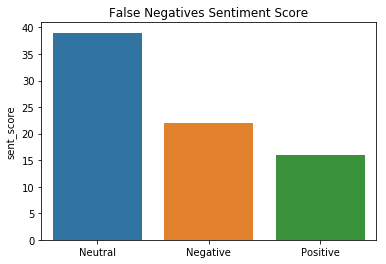

In [215]:
sns.barplot(x = ['Neutral','Negative', "Positive"], y = false_negatives['sent_score'].value_counts())
plt.title('False Negatives Sentiment Score');

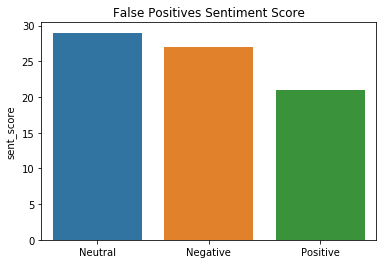

In [219]:
sns.barplot(x = ['Neutral','Negative', "Positive"], y = false_positive['sent_score'].value_counts())
plt.title('False Positives Sentiment Score');

## Final Accuracy Scores 

In [235]:
x_labels = ['SVC',  "Logistic Regression", 'Multinomial']
y_labels = [69.2, 68.2 , 69.2]

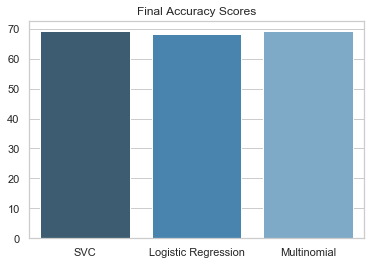

In [238]:


ax = sns.barplot(x= x_labels, y= y_labels, palette = "Blues_d")
plt.title ('Final Accuracy Scores');